# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Libraries that helps with statistical methods and visualizations
from  scipy import stats
from scipy.stats import norm


# Libraries for data preparation and model building
"import *"

# Setting global constants to ensure notebook results are reproducible
"PARAMETER_CONSTANT = ###"

'PARAMETER_CONSTANT = ###'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file, as well as the `df_test` file, into a DataFrame. |

---

In [2]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="four"></a>
## 3. Data Overview
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data overview ⚡ |
| :--------------------------- |
| In this section we will look at the data and determine if there are any missing values, redundant columns, or object data that need to be converted into numerical data. |

---

#### **3.1. Merging df_train and df_test**:

In the initial phase of our analysis, we will consolidate our training and testing datasets to facilitate concurrent data cleansing processes. Following the integration, the last 2920 rows of test data will be segregated once the initial cleaning is complete. This strategic approach is employed to optimize efficiency, preventing redundant cleaning procedures for individual datasets. By doing so, we enhance the speed and effectiveness of our data preparation workflow.

In [3]:
df = pd.concat([df_train, df_test])

#### **3.2. Data Overview**:

We employ the `head()` function to examine the initial two rows of our dataset. This preliminary inspection enables us to discern the nature of our data effectively. Through this examination, we classify columns into distinct categories: categorical and numerical. Presently, our dataset comprises a specific number of columns in each category, providing valuable insights into the composition of our data. This meticulous categorization forms the foundation for our subsequent data preprocessing and modeling endeavors.

In [4]:
df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


We utilize the `tail()` function to inspect the concluding two rows of our dataset, which specifically pertain to the test dataset. It is noteworthy that the 'load_shortfall_3h' variable in these rows is null. This is a deliberate design, as 'load_shortfall_3h' serves as the target variable (y-variable) we aim to predict. By ensuring these values are null in the test dataset, we establish a clear demarcation for our predictive modeling task, facilitating accurate evaluation of our model's performance against actual data points.

In [5]:
df.tail(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.0,0.666667,...,285.150000,284.473333,280.15,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.0,1.333333,...,276.816667,281.133333,276.15,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In reviewing the provided dataframe, several key observations come to light:

- There is an Unnamed: 0 column, which appears to duplicate the dataframe's index.
- The time column captures the date and time corresponding to the data collection instances.
- The dataset contains multiple weather-related variables from various cities across Spain.
- Notably, the predictor variables are followed by our target variable, load_shortfall_3h, which occupies the final column in our dataframe. This structured arrangement facilitates a clear distinction between predictor and target variables, crucial for subsequent analysis and modeling endeavors."

The `shape()` function is employed to ascertain the dimensions of our data. Specifically, this method provides us with the count of rows and columns present in the dataset. Understanding the size of our dataset is fundamental to structuring our analysis and implementing appropriate data processing techniques.

In [6]:
df.shape 

(11683, 49)

Upon applying the `shape()` function, it is revealed that our dataset comprises 11683 rows and 49 columns. This comprehensive understanding of the dataset's dimensions serves as a cornerstone for our subsequent data analysis, feature engineering, and model development processes.

Given the expansive nature of our dataset with 49 columns, it is impractical to visualize all the columns simultaneously. To gain insight into the available features, we employ the `df_train.columns` attribute. This allows us to view the names of all the columns, providing a concise overview of the variables at our disposal.

In [7]:
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

We utilize the `info()` function. This method offers a comprehensive summary of our dataset, providing crucial information such as the presence of categorical and numerical features, as well as detecting any null or missing values. By leveraging this function, we ensure a thorough understanding of our data's structure, enabling us to address potential data inconsistencies and prepare a clean, reliable dataset for our analytical and modeling endeavors.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In our comprehensive data summary, several key insights emerge:

- The majority of our data is numeric, although exceptions include the time, Valencia_wind_deg, and Seville_pressure columns.
- Our dataset comprises 11683 entries and encompasses 49 columns, with load_shortfall_3h serving as the target variable.
- Notably, upon closer inspection, it becomes apparent that the Valencia_pressure column contains fewer non-null values, suggesting the presence of missing data for this particular variable.

To facilitate a robust Exploratory Data Analysis (EDA), it is imperative to conduct preliminary data cleaning and organization within our dataframe. 

<a id="four"></a>
## 4. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data cleaning ⚡ |
| :--------------------------- |
| Now that we have determined the missing values, redundant columns, and incorrect data types, we need to clean the data in order for it to be workable and reliable. |

---

#### **4.1. Remove Missing Vlaues and Redundant Features**:

To maintain a clear demarcation between the cleaned and original datasets, we will create a new dataset named `df_clean`. This separation ensures that our cleaned data remains distinct and preserved, allowing us to conduct analysis and modeling on a curated dataset while retaining the integrity of the original data for reference and comparative purposes.

In [9]:
df_clean = df

Our initial cleaning step involves the removal of the 'Unnamed: 0' column, which is redundant given the presence of an existing indexing column. This elimination optimizes the structure of our dataset, enhancing clarity and simplifying subsequent data analysis and modeling processes.

In [10]:
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

As a part of our data cleansing process, we will address the null values in the 'Valencia_pressure' column. To do so, we will replace these missing values with the mode of the column. Utilizing the mode as the replacement strategy is appropriate for 'pressure' variables, as it signifies the most frequently occurring value and aligns with the nature of the data. This approach ensures the integrity of our dataset by imputing missing values with the most representative and common pressure reading.

In [11]:
print('Mode:') 
print(df['Valencia_pressure'].mode())

Mode:
0    1018.0
Name: Valencia_pressure, dtype: float64


In [12]:
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

"To validate the success of our data cleaning procedure, we can use the `df_clean['Valencia_pressure'].isnull().sum()` function. This expression allows us to check if there are any remaining null values specifically within the 'Valencia_pressure' column of the cleaned dataset (df_clean). 

In [13]:
df_clean.Valencia_pressure.isnull().sum()

0

A zero count of null values in this column confirms the effectiveness of our imputation method, ensuring the absence of missing data in the specified column after our cleaning process.

#### **4.2. Create New Features**:

##### 4.2.1. Covert 'time' into datetime:

As part of feature engineering, we will transform the 'time' column into a datetime format. This conversion is essential for working with temporal data, allowing us to perform time-based analysis and modeling. By converting the 'time' column to datetime format, we enhance the usability of this information, enabling more sophisticated insights into our dataset.

In [14]:
df_clean['time'] = pd.to_datetime(df_clean['time'])

As an additional feature, we will create a new variable that represents the hour of the day based on the 'time' column. Extracting the hour information is valuable for time-based analysis, allowing us to discern patterns and trends related to specific hours. This new variable will provide a granular perspective on our data, enhancing our ability to explore time-sensitive relationships within the dataset.

In [15]:
df_clean['hourofday'] = df_clean['time'].dt.hour

To ensure the successful transformation, we can use the `df_clean['hourofday']` function and confirm that the data is now represented as integers. This verification step ensures that the 'hourofday' variable has been correctly processed and is in the desired integer data type, enabling seamless integration into our analysis and modeling workflows.

In [16]:
df_clean['hourofday']

0        3
1        6
2        9
3       12
4       15
        ..
2915     9
2916    12
2917    15
2918    18
2919    21
Name: hourofday, Length: 11683, dtype: int64

##### 4.2.2. Seperate the 'time' and 'date':

As part of data preprocessing, we will split the 'time' column into separate 'date' and 'time' columns. This separation allows us to independently analyze date-related patterns. By organizing the data in this manner, we enhance the granularity of our analysis, enabling more focused exploration of temporal aspects in our dataset.

In [17]:
df_clean['date'] = df_clean['time'].dt.date
df_clean['time'] = df_clean['time'].dt.time

To organize the 'date' and 'time' columns into a new DataFrame, we will create a separate data structure specifically for these variables. This dedicated DataFrame will allow for streamlined analysis and manipulation of date and time-related information, enhancing the precision of our temporal data exploration.

In [18]:
df_clean = pd.DataFrame(df)

##### 4.2.3. Covert the 'date' into datetime:

To facilitate proper handling and analysis of the 'date' column, we will convert it into datetime format. This conversion ensures that date-related operations can be performed accurately, allowing for meaningful temporal analysis and modeling.

In [19]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

##### 4.2.4. Seperate the 'date' into 'year', 'month', 'day', and 'season':

As part of our data processing, we will extract the year, month, and day information from the 'date' column. This extraction process will yield separate variables representing the year, month, and day, allowing for detailed temporal analysis at different levels of granularity. By extracting these components, we enhance our ability to explore and understand date-related patterns within the dataset.

In [20]:
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day'] = df_clean['date'].dt.day

In the process of data preparation, a function has been defined to rigorously classify months into distinct seasonal categories. This meticulous categorization is essential for precise temporal analysis, allowing for in-depth exploration of seasonal patterns within the dataset.

In [21]:
def get_season(month):
    if month in [3, 4, 5]:  # Spring: March (3) to May (5)
        return 2 # 2 = spring, coverted to an int for workability
    elif month in [6, 7, 8]:  # Summer: June (6) to August (8)
        return 3 # 3 = summer, coverted to an int for workability
    elif month in [9, 10, 11]:  # Autumn: September (9) to November (11)
        return 4 # 4 = autumn, coverted to an int for workability
    else:  # Winter: December (12), January (1), February (2)
        return 1 # 1 = winter, coverted to an int for workability

As a strategic step in our data transformation process, we have applied the meticulously crafted function to create a new column named 'season.' 

In [22]:
df_clean['season'] = df_clean['month'].apply(get_season)

We have created a new DataFrame featuring key temporal attributes. This includes the 'year', 'month', 'day', and 'season' columns, meticulously extracted and classified from the original dataset. This refined DataFrame serves as a comprehensive temporal representation of our data, providing essential granularity for our analytical pursuits. The inclusion of these structured features enhances our dataset's depth, ensuring it is poised for rigorous exploration and advanced modeling methodologies.

In [23]:
df_clean = pd.DataFrame(df)

##### 4.2.5. Remove the 'time' and 'date' column:

In our meticulous data preparation, we have identified both the 'time' and 'date' columns as redundant following the creation of more granular temporal features such as 'hourofday', 'year', 'month', 'day', and 'season'. Consequently, we have prudently removed these redundant columns. This strategic decision streamlines our dataset, eliminating unnecessary information and promoting a streamlined, efficient structure. By eliminating these superfluous columns, we enhance the precision and focus of our data, reinforcing its readiness for advanced analytical methodologies and modeling processes.

In [24]:
df_clean.drop(columns=['time'], inplace=True)

In [25]:
df_clean.drop(columns=['date'], inplace=True)

In order to validate the applied enhancements, we will meticulously examine the initial two rows of the refined DataFrame. This critical step ensures the accuracy and integrity of our data processing procedures, setting the stage for a robust and reliable modeling process.

In [26]:
df_clean.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,hourofday,year,month,day,season
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,269.338615,274.254667,265.938000,265.938000,6715.666667,3,2015,1,1,1
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,270.376000,274.945000,266.386667,266.386667,4171.666667,6,2015,1,1,1


When scrolling to the conclusion of the dataset, one can observe the integration of the newly created columns.

##### 4.2.6. Convert 'Valencia_wind_deg' into an int:

To refine the 'Valencia_wind_deg' column further, we will extract only the numerical values.

In [27]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')

Next, we will transform the 'Valencia_wind_deg' column to a numeric data type. his conversion ensures uniform numerical representation, aligning with the datatype requirements for precise analysis and modeling.

In [28]:
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

To validate the successful transformation, we will conduct a verification check to confirm the 'Valencia_wind_deg' column has been converted to the numeric data type.

In [29]:
df_clean.Valencia_wind_deg

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

As evident from the current data representation, the 'Valencia_wind_deg' column has been successfully transformed into an integer data type. This confirmation reaffirms the accuracy of our data processing steps, ensuring a seamless transition to a numeric format.

##### 4.2.7. Convert 'Seville_pressure' into an int:

To refine the 'Seville_pressure' column further, we will extract only the numerical values.

In [30]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')

Next, we will transform the 'Seville_pressure' column to a numeric data type. his conversion ensures uniform numerical representation, aligning with the datatype requirements for precise analysis and modeling.

In [31]:
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])

To validate the successful transformation, we will conduct a verification check to confirm the 'Seville_pressure' column has been converted to the numeric data type.

In [32]:
df_clean.Seville_pressure

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

#### **4.3 Engineer Existing Features**:

##### 4.3.1. Change the order of the columns:

As a part of our data organization strategy, we will rearrange the columns based on the cities for enhanced convenience and readability. This restructuring will optimize the presentation of our data, ensuring a logical and intuitive arrangement. Crucially, we will preserve the y-value, 'load_shortfall_3h', at the very end of the dataset. This meticulous ordering not only fosters clarity but also facilitates streamlined data interpretation and analysis, setting the stage for effective modeling and insights extraction.

In [33]:
desired_column_order = ['season' ,'year', 'month', 'day', 'hourofday', 'Barcelona_weather_id' , 'Barcelona_wind_speed', 
                        'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 'Barcelona_temp_max' , 'Barcelona_rain_1h', 
                        'Barcelona_rain_3h' , 'Barcelona_pressure', 'Bilbao_weather_id' , 'Bilbao_wind_speed' , 'Bilbao_wind_deg' , 
                        'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure',
                        'Bilbao_clouds_all', 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,
                        'Madrid_rain_1h' , 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity', 'Seville_weather_id' , 'Seville_wind_speed' , 
                        'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 'Seville_rain_3h' , 'Seville_pressure' , 
                        'Seville_clouds_all' , 'Seville_humidity', 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 
                        'Valencia_temp_min' , 'Valencia_snow_3h' , 'Valencia_pressure', 'Valencia_humidity', 'load_shortfall_3h']
df_clean = df_clean[desired_column_order]

In [34]:
df_clean.head()

,season,year,month,day,hourofday,Barcelona_weather_id,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_temp,Barcelona_temp_min,...,Seville_humidity,Valencia_wind_speed,Valencia_wind_deg,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_snow_3h,Valencia_pressure,Valencia_humidity,load_shortfall_3h
0,1,2015,1,1,3,800.0,6.333333,42.666667,281.013000,281.013000,...,74.333333,0.666667,5,269.888000,269.888000,269.888000,0.0,1002.666667,75.666667,6715.666667
1,1,2015,1,1,6,800.0,4.000000,139.000000,280.561667,280.561667,...,78.333333,1.666667,10,271.728333,271.728333,271.728333,0.0,1004.333333,71.000000,4171.666667
2,1,2015,1,1,9,800.0,2.000000,326.000000,281.583667,281.583667,...,71.333333,1.000000,9,278.008667,278.008667,278.008667,0.0,1005.333333,65.666667,4274.666667
3,1,2015,1,1,12,800.0,2.333333,273.000000,283.434104,283.434104,...,65.333333,1.000000,8,284.899552,284.899552,284.899552,0.0,1009.000000,54.000000,5075.666667
4,1,2015,1,1,15,800.0,4.333333,260.000000,284.213167,284.213167,...,59.000000,1.000000,7,283.015115,283.015115,283.015115,0.0,1018.000000,58.333333,6620.666667


With the completion of our data cleansing process and the meticulous arrangement of columns in a logical order, our dataset now stands as a refined and organized foundation for our analytical endeavors. This structured approach ensures data coherence, enhancing our ability to extract meaningful insights and develop robust models. The methodical organization of the dataset sets the stage for rigorous analysis, reinforcing the reliability and integrity of our research efforts.

<a id="three"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the DataFrame. |

---


#### **5.1. Data breakdown:**

Given the extensive nature of our dataset, to facilitate a more comprehensive understanding, we will partition it into manageable sections. This approach enables us to delve into specific segments of the data systematically, promoting a thorough exploration and insightful analysis. Breaking down the dataset in this manner ensures that each part receives due attention, allowing for a meticulous examination of the underlying patterns and trends, thus enhancing the depth and accuracy of our analysis.

##### 5.1.1. df_time_y:

In the creation of the first section, denoted as 'df_1', we have meticulously curated specific columns essential for our analysis. This refined subset includes 'hourofday', 'year', 'month', 'day', 'season', and 'load_shortfall_3h'. By isolating these key features, 'df_1' encapsulates the temporal, seasonal, and target variables critical for our modeling endeavors. This focused approach allows for a detailed examination of the dataset's temporal and target-related patterns, providing a foundational segment for our in-depth analysis.

In [35]:
df_time_y = df_clean[['hourofday', 'year', 'month', 'day', 'season', 'load_shortfall_3h']]

Let's examine the initial two rows of the 'df_time_y' DataFrame to gain an initial insight into this specifically curated subset.

In [36]:
df_time_y.head(2)

,hourofday,year,month,day,season,load_shortfall_3h
0,3,2015,1,1,1,6715.666667
1,6,2015,1,1,1,4171.666667


Let us begin our analysis by directing our attention towards the focal point of our study, the target variable `load_shortfall_3h`. This variable represents a crucial aspect of our dataset, embodying the essence of our predictive modeling endeavor. 

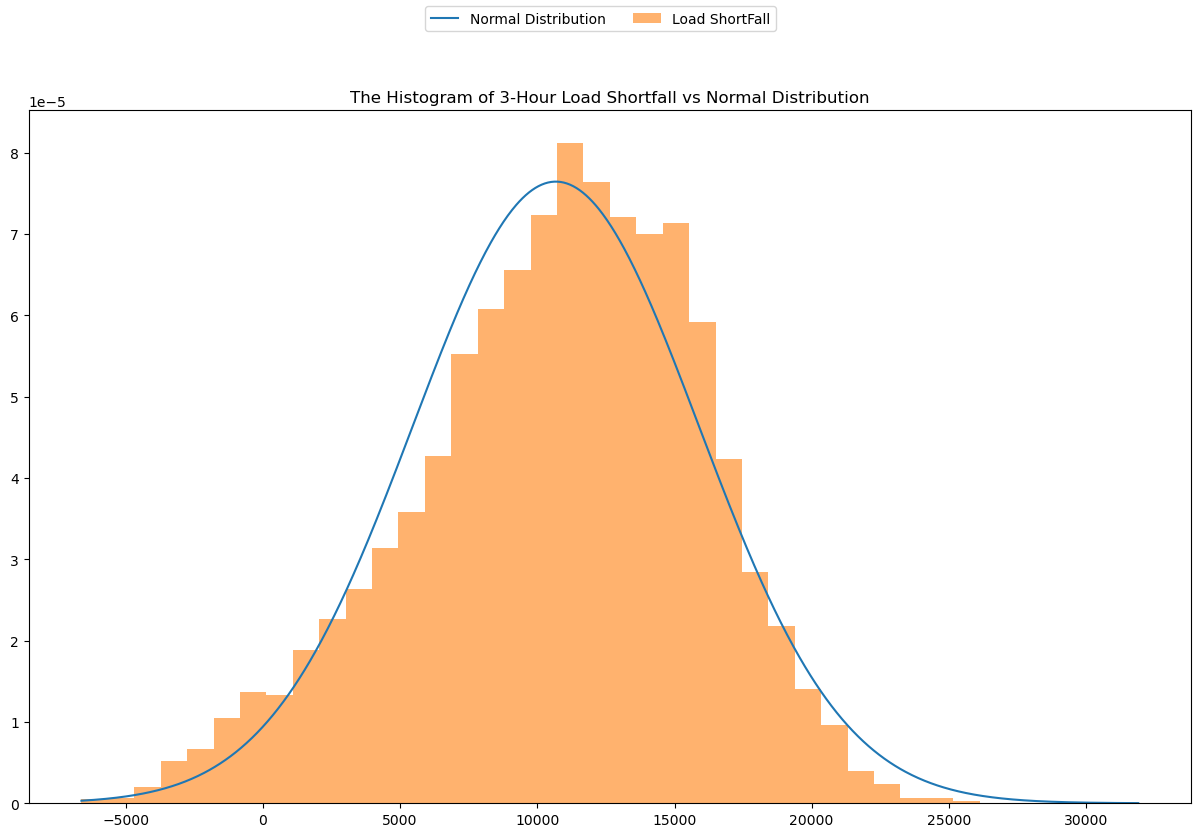

In [37]:
# Create a new figure object
fig, ax = plt.subplots(figsize=(15,9))

# Calculate important metrics from dataframe
mean_val =  df_time_y['load_shortfall_3h'].mean()
std_dev = df_time_y['load_shortfall_3h'].std()
min_val, max_val = df_clean['load_shortfall_3h'].min(), df_clean['load_shortfall_3h'].max()

# Plot the theoretical normal distribution of target variable
x = np.linspace(min_val, max_val, 1000)
ax.plot(x, norm.pdf(x, mean_val, std_dev), label = "Normal Distribution")

# Plot the normalized histogram of target variable
ax.hist(df_clean['load_shortfall_3h'].values,
        alpha=0.6,
        label='Load ShortFall',
        bins=40,
        density=True
       )

# Set title of figure
ax.set_title("The Histogram of 3-Hour Load Shortfall vs Normal Distribution")

# Create lines and labels for use in legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Insert figure legend and show the final figure
fig.legend(lines, labels, loc='upper center', ncol=2)
plt.show()

We see that our target variable is slightly skewed to the left from an ideal normal distribution. This can also be shown when we investigate the skew and kurtosis of our data explicitly, as done below.

In [38]:
print(f"The Skew is {df_time_y.load_shortfall_3h.skew()}")
print(f"The Kurtosis is {df_time_y.load_shortfall_3h.kurtosis()}")

The Skew is -0.384847070902431
The Kurtosis is -0.11899877049908492


Upon analyzing our target variable, `load_shortfall_3h`, we observe a negative skewness, suggesting a slightly more pronounced tail on the left side of the distribution. This indicates that there are more values clustered to the right of the mean, indicating a leftward skew. The relatively small skew value signifies a fairly symmetric distribution of our target variable. Furthermore, the low kurtosis value suggests a lack of outliers, indicating a relatively tight distribution. These statistical insights provide valuable context, guiding our understanding of the variable's distribution and aiding in the formulation of our modeling strategies.

Next, let's look at some descriptive statistics for the rest of our variables:

In [39]:
df_time_y.describe()

,hourofday,year,month,day,season,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,10.498844,2016.500300,6.525122,15.735256,2.503723,10673.857612
std,6.873990,1.117584,3.447945,8.798064,1.114510,5218.046404
min,0.000000,2015.000000,1.000000,1.000000,1.000000,-6618.000000
25%,4.500000,2016.000000,4.000000,8.000000,2.000000,7390.333333
50%,9.000000,2016.000000,7.000000,16.000000,3.000000,11114.666667
75%,15.000000,2017.000000,10.000000,23.000000,3.000000,14498.166667
max,21.000000,2018.000000,12.000000,31.000000,4.000000,31904.000000


In an effort to enhance the interpretability of our dataset, we acknowledge the challenges posed by the current tabular representation. To address this, we will categorize our variables based on their skewness. Variables demonstrating significant departure from symmetry will be labeled as heavily skewed, those with moderate skewness will be categorized as moderately skewed, and those exhibiting relative symmetry will be identified as relatively symmetrical. This classification will not only streamline our understanding of the dataset but also pave the way for a more intuitive and insightful analysis.

In [40]:
# Create dataframe containing skewness of all potential predictor variables:
skew_df = df_time_y.drop('load_shortfall_3h', axis=1).skew().to_frame()

# Display variables with high skewness
Highly_Pos_Skew = skew_df[(skew_df[0] >= 1)]
Highly_Neg_Skew = skew_df[(skew_df[0] <= -1)]
print("High positive skew:", Highly_Pos_Skew, "\n \n")
print("High negative skew:", Highly_Neg_Skew, "\n \n")

# Display variables with moderate skewness:
Mod_Pos_Skew = skew_df[(skew_df[0] > 0.5) & (skew_df[0] < 1) ]
Mod_Neg_Skew = skew_df[(skew_df[0] < -0.5) & (skew_df[0] > -1)]
print("Moderate positive skew:", Mod_Pos_Skew, "\n \n")
print("Moderate negative skew:", Mod_Neg_Skew, "\n \n")

# Display relatively symmetrical values:
Sym_skew = skew_df[(skew_df[0] <= 0.5) & (skew_df[0] >= -0.5) ]
print("Relatively Symmetrical:", Sym_skew, "\n \n")

High positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

High negative skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate positive skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Moderate negative skew: Empty DataFrame
Columns: [0]
Index: [] 
 

Relatively Symmetrical:                   0
hourofday  0.000539
year       0.000169
month     -0.009772
day        0.006368
season    -0.003971 
 



Upon a careful analysis of the variables in this section, it is evident that all the data exhibits a relatively symmetrical distribution. This symmetry implies a balanced distribution of values, contributing to a stable and predictable pattern within these features. The absence of heavily skewed or excessively skewed variables in this context underscores the dataset's balanced nature, allowing for a more straightforward interpretation and modeling process. This observation provides valuable insights, affirming the stability and uniformity of the data in this specific section.

Let's repeat the same process for calculating the Kurtosis:

In [41]:
# Create dataframe containing Kurtosis of all potential predictor variables:
kurt_df = df_time_y.drop('load_shortfall_3h', axis=1).kurtosis().to_frame()

# Display variables with high Kurtosis:
high_kurt= kurt_df[(kurt_df[0] >= 3)]
print("High kurtosis (Large amount of outliers):", high_kurt, "\n \n")

# Display variables with low Kurtosis:
low_kurt= kurt_df[(kurt_df[0] < 3)]
print("Low kurtosis (Small amount of outliers):", low_kurt, "\n \n")

High kurtosis (Large amount of outliers): Empty DataFrame
Columns: [0]
Index: [] 
 

Low kurtosis (Small amount of outliers):                   0
hourofday -1.237925
year      -1.358928
month     -1.207583
day       -1.193694
season    -1.351853 
 



Similarly, our analysis indicates a low kurtosis across the dataset, signifying a limited presence of outliers within the variables. The low kurtosis values reinforce the observation of a relatively tight distribution, indicating that the majority of data points are clustered near the mean. This characteristic enhances the dataset's stability and consistency, reinforcing the reliability of our data and bolstering the foundation for our subsequent analytical and modeling efforts.

Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. These visualizations will not only corroborate the metrics calculated earlier but also offer nuanced insights into the distributional patterns of each variable. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

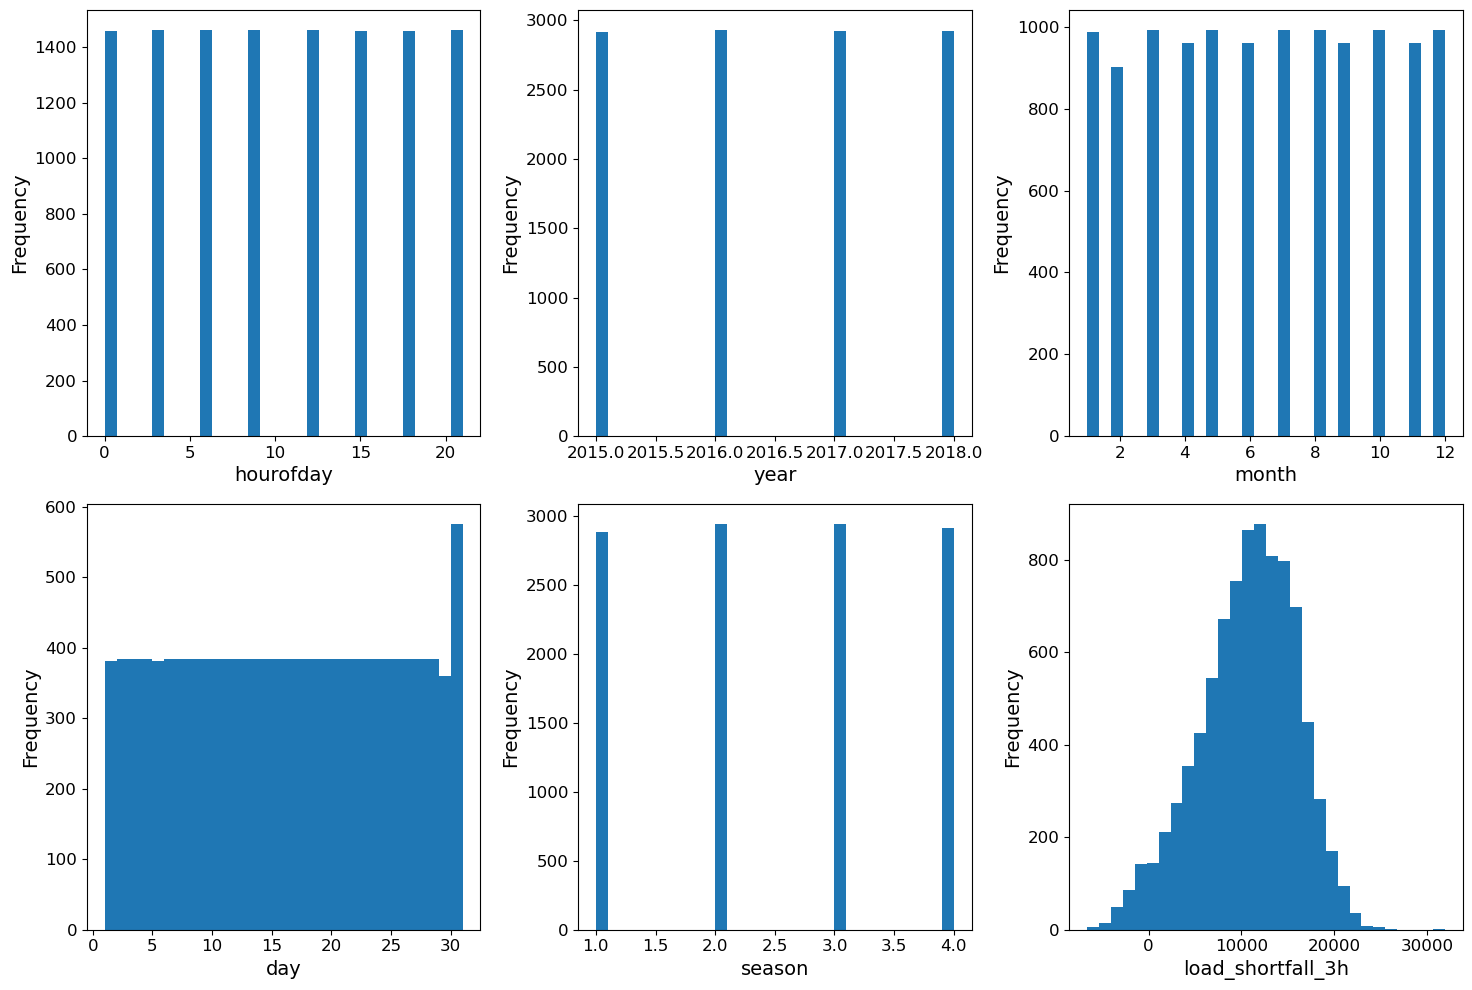

In [42]:
# Define the number of rows and columns for subplots
number_of_rows = 2  # Number of rows in the subplot grid
number_of_columns = 3  # Number of columns in the subplot grid

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_time_y.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_time_y[column], bins=30)
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In this section, the data exhibits a generally uniform distribution, with subtle variations. February stands out with a noticeable decrease in frequency, indicating a unique pattern specific to this month. Additionally, there is a discernible increase in frequency on the last day of each month.

Correlation coefficient is a measure of the how variables are related to one another. It is a standardized covariance, which measures how two random variables change with respect to each other. Since Covariance is scale dependent, we use the correlation coefficient (specifically Pearson Correlation) which standardizes the covariance to a scale between -1 and 1.

* A correlation coefficient closer 1 represents a strong linear relationship in the same direction, 
* A correlation coefficient closer to -1 represents a strong linear relationship in the opposite direction,
* A correlation closer to 0 represents a weak relationship.

The formula is given by:
$$\rho=\frac{Cov(X,Y)}{\sigma(X)\sigma(Y)}$$
Where
* $Cov(X,Y)$ represents the covariance between X and Y
* $\sigma(X)$ & $\sigma(Y)$ represent the standard deviations of X & Y respectively

Let's utilize the corr() function to explore the correlations among our dataset variables. Correlation analysis enables us to discern relationships between different features, shedding light on potential dependencies within the data. This quantitative approach is fundamental in identifying patterns and guiding subsequent analytical decisions, enriching our understanding of the underlying dynamics in the dataset.

In [43]:
df_time_y.corr()

,hourofday,year,month,day,season,load_shortfall_3h
hourofday,1.000000,0.000226,0.000226,0.000214,0.000227,0.139285
year,0.000226,1.000000,-0.000452,-0.001320,-0.000362,0.131324
month,0.000226,-0.000452,1.000000,0.009592,0.574336,0.199048
day,0.000214,-0.001320,0.009592,1.000000,0.002890,0.092116
season,0.000227,-0.000362,0.574336,0.002890,1.000000,0.176688
load_shortfall_3h,0.139285,0.131324,0.199048,0.092116,0.176688,1.000000


Considering the extensive nature of our dataset involving 49 variables, an intuitive approach to grasp the interrelationships is through a visual representation. A heatmap of correlation provides a clear, graphical depiction of the correlation coefficients among the variables. By employing this visualization, we can readily discern patterns of strong correlations, facilitating a more precise understanding of the intricate relationships within our data. This visual analysis enhances our ability to identify key variables and informs our subsequent analytical decisions effectively.

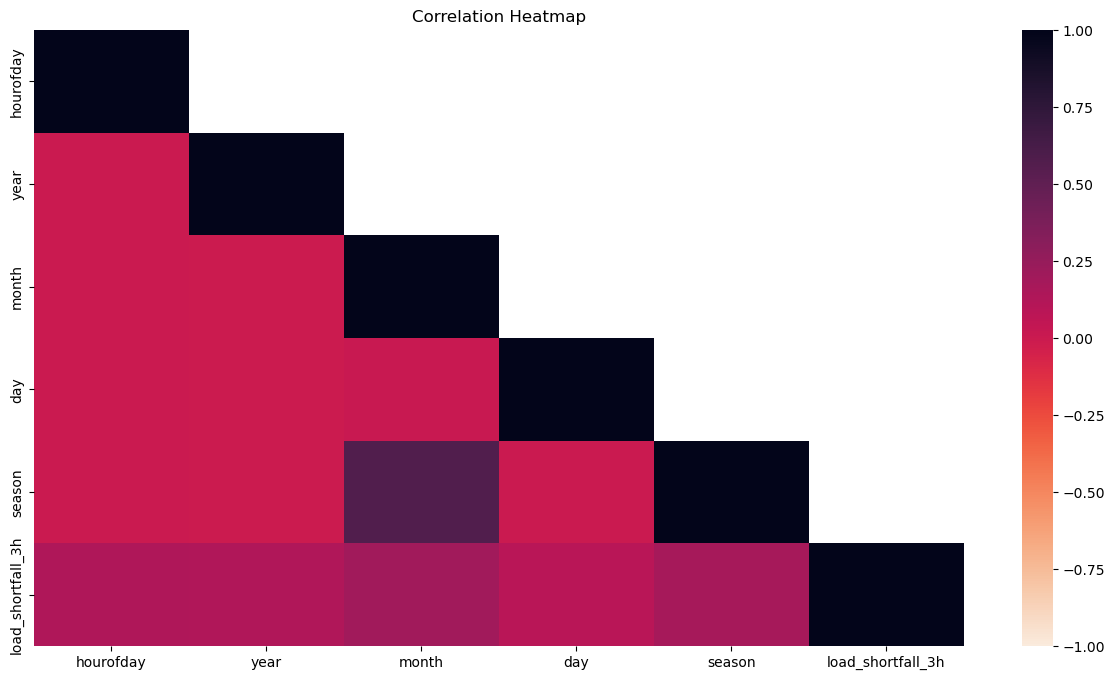

In [44]:
# Initiate a new figure object to plot our heatmap
plt.figure(figsize=(15,8))

# We look at only the lower triangle of the array, since it is symmetric around the diagonal
mask = np.tril(df_time_y.corr())==0



# Plotting the heatmap
sns.heatmap(df_time_y.corr(),
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap='rocket_r'
           )

plt.title('Correlation Heatmap');

The robust correlation observed between 'month' and 'season' indeed aligns with our expectations. However, the particularly strong correlation of 'month' (and consequently 'season') with 'load_shortfall_3h' is a noteworthy observation. This finding suggests a compelling seasonal pattern, wherein energy load shortfalls exhibit consistent fluctuations throughout the year, potentially influenced by seasonal factors. Understanding this correlation sheds light on the intricate relationship between temporal variables and our target variable, offering valuable insights into the dataset's underlying dynamics. Such revelations are instrumental in refining our modeling strategies and formulating hypotheses for further investigation.

To gain a more direct and focused insight into the relationship between 'load_shortfall_3h' and 'month', we will visualize this interaction using a boxplot. This graphical representation will provide a clear and concise depiction of how energy load shortfalls vary across different months, enabling us to discern any prominent patterns, seasonal trends, or outliers in the data.

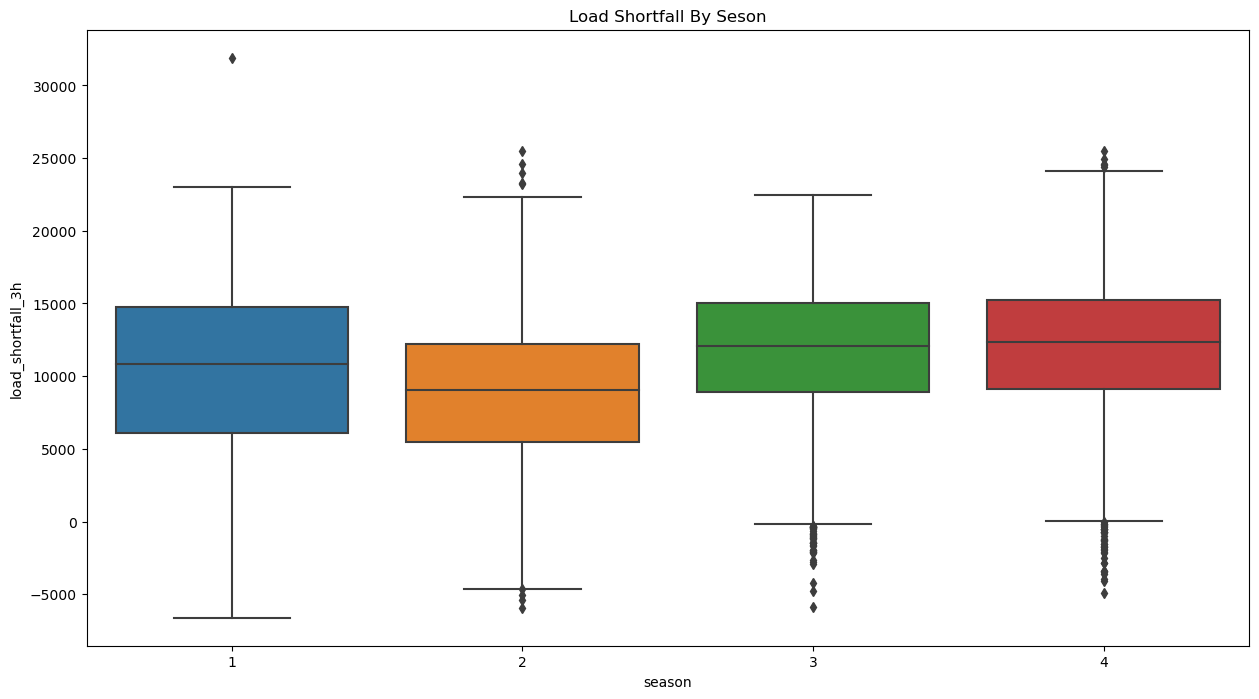

In [45]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_time_y, x="season", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Seson')
plt.show()

Upon examining the boxplot, distinct patterns emerge in the distribution of 'load_shortfall_3h' across different seasons. Notably, the winter months exhibit a higher variability in load shortfalls, accompanied by an overall higher maximum value. In contrast, while summer and autumn share a comparable maximum, the distribution during these seasons appears less spread out, indicating a more concentrated range of load shortfalls. This observation underscores the impact of seasonal variations, highlighting the unique energy consumption dynamics during winter months and the relatively stabilized patterns in summer and autumn. 

Extending our analysis to examine the relationship between 'load_shortfall_3h' and 'year' provides a broader perspective on the dataset. By conducting similar analyses per year, we aim to uncover potential trends, fluctuations, or patterns in energy load shortfalls over different years. 

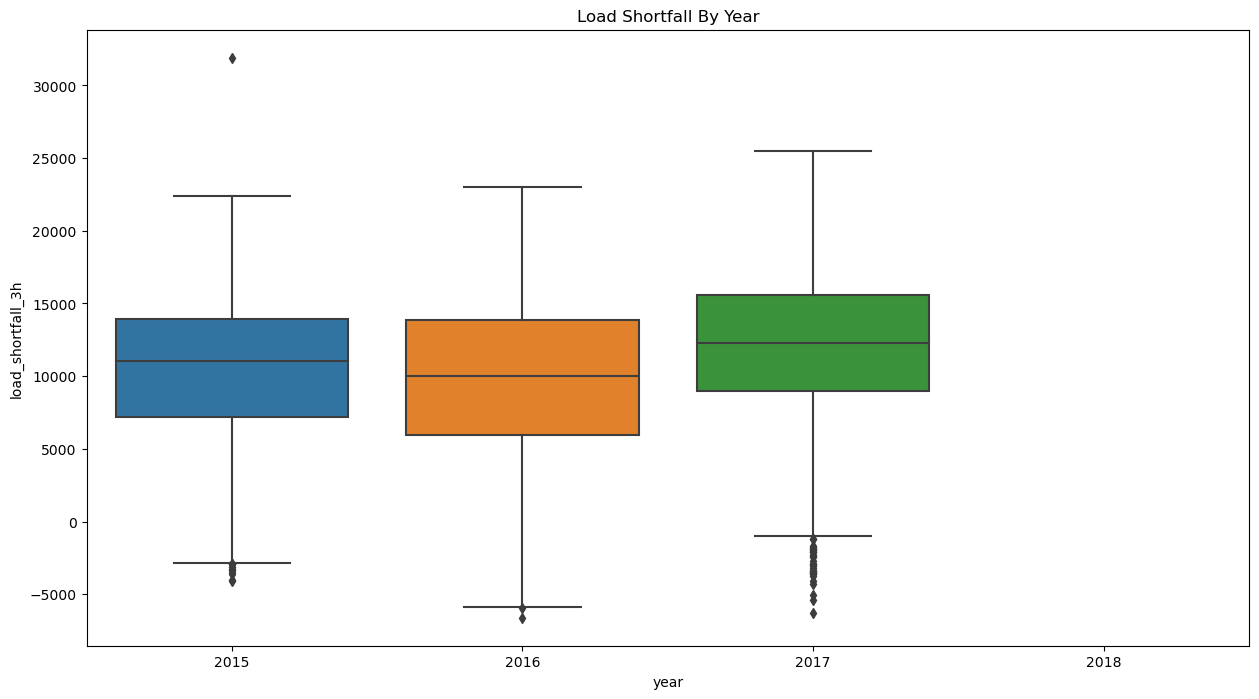

In [46]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_time_y, x="year", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Year')
plt.show()

Distinct patterns emerge when analyzing 'load_shortfall_3h' across different years. Specifically, in the year 2015, there is minimal variation in the data, indicating a relatively stable trend in energy load shortfalls. In 2016, the variation increases, signifying a broader range of load shortfalls compared to the previous year. Notably, 2017 exhibits a higher maximum value, suggesting more significant load shortfalls, albeit with less overall variation in the data. These observations underscore the evolving energy consumption dynamics over the years, highlighting fluctuations and potential shifts in the underlying patterns.

Let's compare the 'load_shortfall_3h' with the 'houroftheday'.  By exploring this relationship, we aim to identify specific hours during which load shortfalls are more prevalent or exhibit distinct patterns.

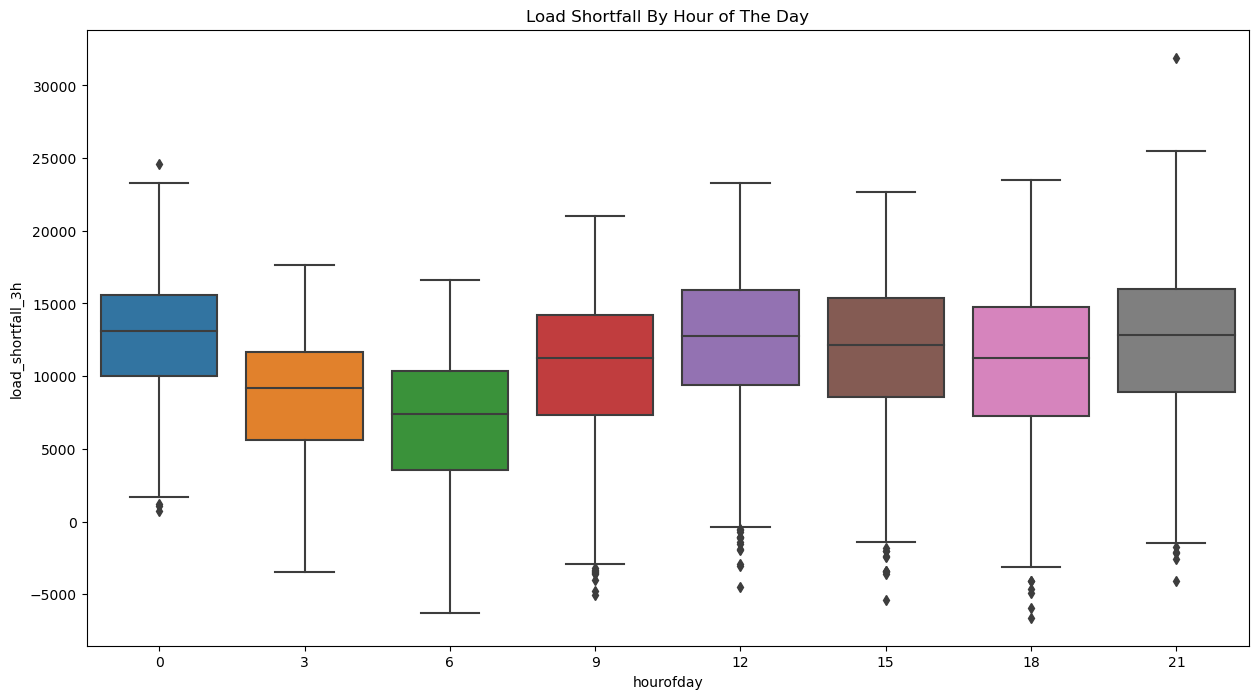

In [47]:
# Initiate a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot the distribution of load shortfall per year
sns.boxplot(data=df_time_y, x="hourofday", y="load_shortfall_3h")

# Set figure title and display image
ax.set_title('Load Shortfall By Hour of The Day')
plt.show()

Upon thorough analysis, it becomes evident that the occurrences of load shortfalls are most pronounced during the hours 0, 12, and 21. Conversely, the incidence of load shortfalls is comparatively lower during the hours 6 and 3. This discernment of hourly patterns provides crucial insights into the fluctuating demand dynamics, aiding in the identification of peak and off-peak periods.

Finally, lets consider the impact that the day of the week has on the production of renewable energy:

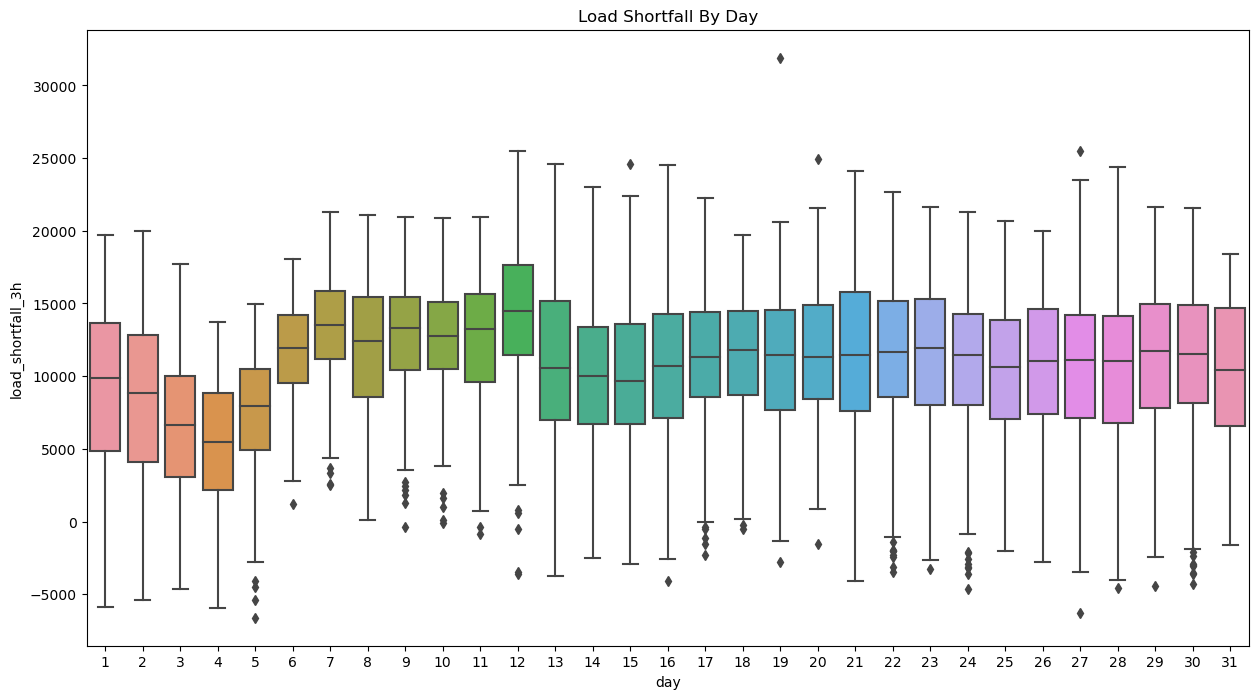

In [48]:
# Initialize a new figure object
fig, ax = plt.subplots(figsize=(15,8))

# Plot target variable as a function of weekday
sns.boxplot(data=df_time_y,
            x="day",
            y="load_shortfall_3h"
           )

# Set title, set x axis to corresponding day of the week and display image
ax.set_title('Load Shortfall By Day')
plt.show()

Tt is evident that the production of renewable energy maintains a stable trend throughout the month. However, a notable decline is observed during days 3 to 5. This decline highlights a specific period of reduced renewable energy generation, potentially influenced by external factors or operational considerations.

##### 3.3.2. df_Barcelona:

Subsequently, we will conduct a comprehensive examination of all the data related to Barcelona. This detailed scrutiny will encompass various features specific to this city, providing a nuanced understanding of the dataset's Barcelona-centric attributes. By immersing ourselves in this focused exploration, we aim to uncover city-specific patterns and trends, thus enriching our overall insights into the dataset.

In [49]:
df_Barcelona = df_clean[['Barcelona_weather_id' , 'Barcelona_wind_speed', 'Barcelona_wind_deg' , 'Barcelona_temp', 'Barcelona_temp_min', 
           'Barcelona_temp_max' , 'Barcelona_rain_1h', 'Barcelona_rain_3h' , 'Barcelona_pressure']]

 We will commence our exploration by examining the initial entries of the df_Barcelona DataFrame. This pivotal step allows us to glean essential insights from the first two rows of the dataset, laying the foundation for our comprehensive analysis and informed decision-making in the modeling process.

In [50]:
df_Barcelona.head(2)

,Barcelona_weather_id,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_temp,Barcelona_temp_min,Barcelona_temp_max,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_pressure
0,800.0,6.333333,42.666667,281.013000,281.013000,281.013000,0.0,0.0,1036.333333
1,800.0,4.000000,139.000000,280.561667,280.561667,280.561667,0.0,0.0,1037.333333


Next, let's look at some descriptive statistics for the rest of our variables:

In [51]:
df_Barcelona.describe()

,Barcelona_weather_id,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_temp,Barcelona_temp_min,Barcelona_temp_max,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_pressure
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04
mean,764.603446,2.782419,187.654241,289.869413,288.616766,291.042128,0.108534,0.000331,1.287326e+03
std,90.736191,1.758587,88.694717,6.680538,6.391989,7.236360,0.556794,0.003466,1.218906e+04
min,200.666667,0.000000,0.000000,270.816667,269.483333,272.150000,0.000000,0.000000,6.706667e+02
25%,800.000000,1.333333,116.666667,284.816667,284.150000,285.338609,0.000000,0.000000,1.013667e+03
50%,800.000000,2.333333,193.333333,289.426667,288.276333,290.150000,0.000000,0.000000,1.017333e+03
75%,801.000000,3.666667,260.000000,295.150000,293.483333,296.816667,0.000000,0.000000,1.021167e+03
max,804.000000,12.666667,360.000000,308.150000,306.816667,314.076667,12.000000,0.093000,1.001411e+06


Taking our analysis a step further, we will employ visualization techniques to gain a deeper understanding of our variables. By generating histograms for each individual variable, we can unravel the inherent structure of our data. This visual exploration is instrumental in unraveling the complexities of our dataset, paving the way for a more comprehensive and informed analysis.

In [52]:
# Calculate the number of rows and columns based on the DataFrame's shape
number_of_rows = df_Barcelona.shape[0]  # Number of rows in DataFrame
number_of_columns = df_Barcelona.shape[1]  # Number of columns in DataFrame

# Plots histograms for all features with larger labels
fig, axes = plt.subplots(figsize=(15, 10), nrows=number_of_rows, ncols=number_of_columns)

# Iterate through the columns of the DataFrame and plot histograms
for i, column in enumerate(df_Barcelona.columns):
    row_index = i // number_of_columns
    col_index = i % number_of_columns
    ax = axes[row_index, col_index]
    
    ax.hist(df_Barcelona[column], bins=30)
    ax.set_xlabel(column, fontsize=14)  # Set x-axis label with fontsize 14
    ax.set_ylabel('Frequency', fontsize=14)  # Set y-axis label with fontsize 14
    ax.tick_params(axis='both', which='both', labelsize=12)  # Set tick label fontsize

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

KeyboardInterrupt: 

##### 3.3.3. df_Bilbao:

In [ ]:
# df_Bilbao will include the 'Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure','Bilbao_clouds_all' columns
df_Bilbao = df_clean[['Bilbao_temp' , 'Bilbao_temp_min' , 'Bilbao_temp_max' , 'Bilbao_rain_1h', 'Bilbao_snow_3h', 'Bilbao_pressure','Bilbao_clouds_all']]

In [ ]:
# let's print the first two rows of df_Bilbao
df_Bilbao.head(2)

,Bilbao_temp,Bilbao_temp_min,Bilbao_temp_max,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_pressure,Bilbao_clouds_all
0,269.338615,269.338615,269.338615,0.0,0.0,1035.000000,0.0
1,270.376000,270.376000,270.376000,0.0,0.0,1035.666667,0.0


##### 3.3.4. df_Madrid:

In [ ]:
# df_Madrid will include the 'Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' ,'Madrid_rain_1h' , 
# 'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity' columns
df_Madrid = df_clean[['Madrid_weather_id' , 'Madrid_wind_speed', 'Madrid_temp' , 'Madrid_temp_min' , 'Madrid_temp_max' , 'Madrid_rain_1h' , 
           'Madrid_pressure' , 'Madrid_clouds_all' , 'Madrid_humidity']]

In [ ]:
# let's print the first two rows of df_Madrid
df_Madrid.head(2)

,Madrid_weather_id,Madrid_wind_speed,Madrid_temp,Madrid_temp_min,Madrid_temp_max,Madrid_rain_1h,Madrid_pressure,Madrid_clouds_all,Madrid_humidity
0,800.0,0.666667,265.938000,265.938000,265.938000,0.0,971.333333,0.0,64.000000
1,800.0,0.333333,266.386667,266.386667,266.386667,0.0,972.666667,0.0,64.666667


##### 3.3.5. df_Seville

In [ ]:
# df_Seville will include the 'Seville_weather_id' , 'Seville_wind_speed' , 'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 
# 'Seville_rain_3h' , 'Seville_pressure' , 'Seville_clouds_all' , 'Seville_humidity' columns
df_Seville = df_clean[['Seville_weather_id' , 'Seville_wind_speed' , 'Seville_temp' , 'Seville_temp_min' , 'Seville_temp_max' , 'Seville_rain_1h' , 
           'Seville_rain_3h' , 'Seville_pressure' , 'Seville_clouds_all' , 'Seville_humidity']]

In [ ]:
# let's print the first two rows of df_Seville
df_Seville.head(2)

,Seville_weather_id,Seville_wind_speed,Seville_temp,Seville_temp_min,Seville_temp_max,Seville_rain_1h,Seville_rain_3h,Seville_pressure,Seville_clouds_all,Seville_humidity
0,800.0,3.333333,274.254667,274.254667,274.254667,0.0,0.0,25,0.0,74.333333
1,800.0,3.333333,274.945000,274.945000,274.945000,0.0,0.0,25,0.0,78.333333


##### 3.3.6. df_Valencia:

In [ ]:
# df_Valencia will include the 'Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 'Valencia_temp_min' , 'Valencia_snow_3h' , 
# 'Valencia_pressure', 'Valencia_humidity' columns
df_Valencia = df_clean[['Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 'Valencia_temp_min' , 'Valencia_snow_3h' , 
           'Valencia_pressure', 'Valencia_humidity']]

In [ ]:
# let's print the first two rows of df_Valencia
df_Valencia.head(2)

,Valencia_wind_speed,Valencia_wind_deg,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_snow_3h,Valencia_pressure,Valencia_humidity
0,0.666667,5,269.888000,269.888000,269.888000,0.0,1002.666667,75.666667
1,1.666667,10,271.728333,271.728333,271.728333,0.0,1004.333333,71.000000


In [ ]:
# using the df.isnull().sum() function, we can determine if there are any null values in the data
df_Valencia.isnull().sum()
# we can see that the column 'Valencia_pressure' has a large amount of null values

Valencia_wind_speed    0
Valencia_wind_deg      0
Valencia_temp          0
Valencia_temp_max      0
Valencia_temp_min      0
Valencia_snow_3h       0
Valencia_pressure      0
Valencia_humidity      0
dtype: int64

<AxesSubplot:xlabel='Valencia_pressure'>

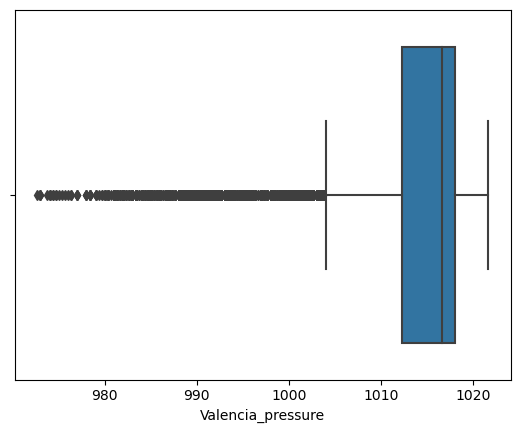

In [ ]:
sns.boxplot(df['Valencia_pressure'])

In [ ]:
# let's look at the statistics of df_Valencia
df.Valencia_pressure.describe()

count    11683.000000
mean      1013.567063
std          8.146984
min        972.666667
25%       1012.333333
50%       1016.666667
75%       1018.000000
max       1021.666667
Name: Valencia_pressure, dtype: float64

In [ ]:
# we want to know the mode of the data set too
print('Mode:') 
print(df['Valencia_pressure'].mode())
# we will use this mode in order to replace the missing values in this column

Mode:
0    1018.0
Name: Valencia_pressure, dtype: float64


Later in the notebook, we will clean the data and replace all the missing values in 'Valencia_pressure' with it's mode. 

Let's analyse the cleaned data:

*3.3.6.1. Histogram of Valencia variables:*

<Figure size 1200x800 with 0 Axes>

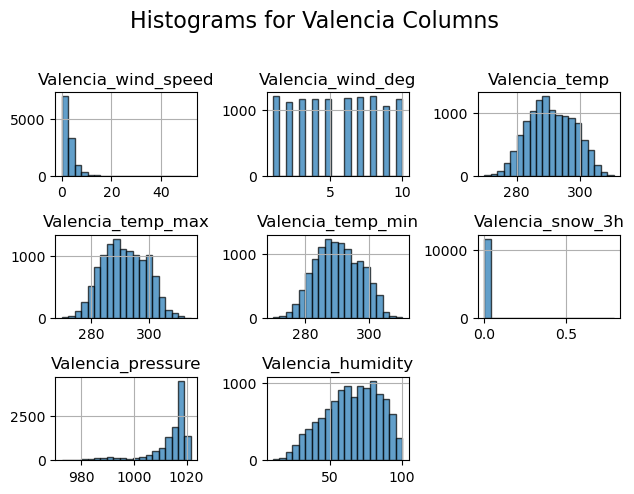

In [ ]:
plt.figure(figsize=(12, 8))
df_clean[['Valencia_wind_speed' , 'Valencia_wind_deg', 'Valencia_temp' , 'Valencia_temp_max' , 'Valencia_temp_min' , 'Valencia_snow_3h' , 
          'Valencia_pressure', 'Valencia_humidity']].hist(bins=20, edgecolor='black', alpha=0.7)
plt.suptitle("Histograms for Valencia Columns", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


*3.3.6.2. Humidity Distribution by Season:*

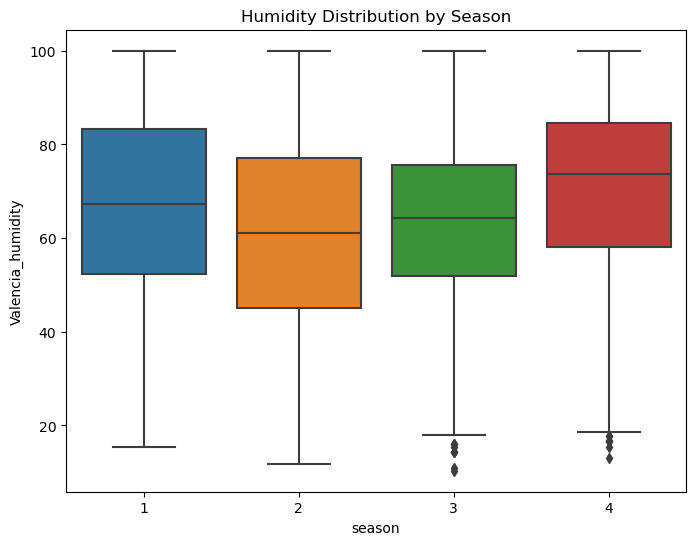

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='Valencia_humidity', data=df_clean)
plt.title('Humidity Distribution by Season')
plt.show()

*3.3.6.3. Temperature vs. Wind Speed:*

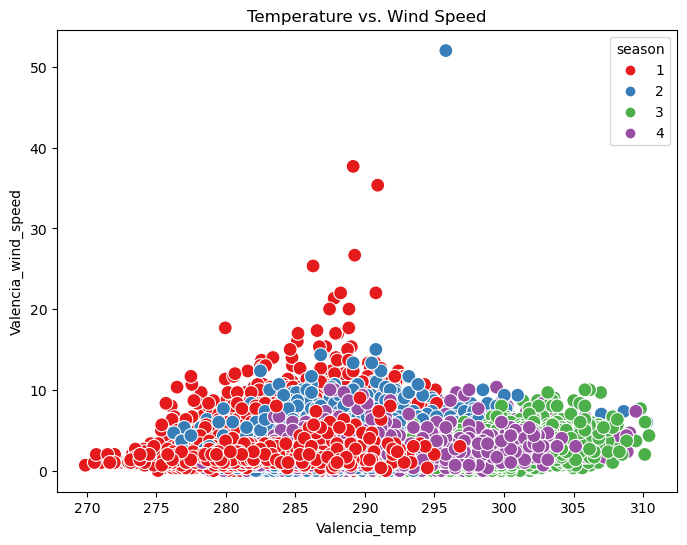

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Valencia_temp', y='Valencia_wind_speed', data=df_clean, hue='season', palette='Set1', s=100)
plt.title('Temperature vs. Wind Speed')
plt.show()

*3.3.6.4. Pair Plot for Valencia Variables:*

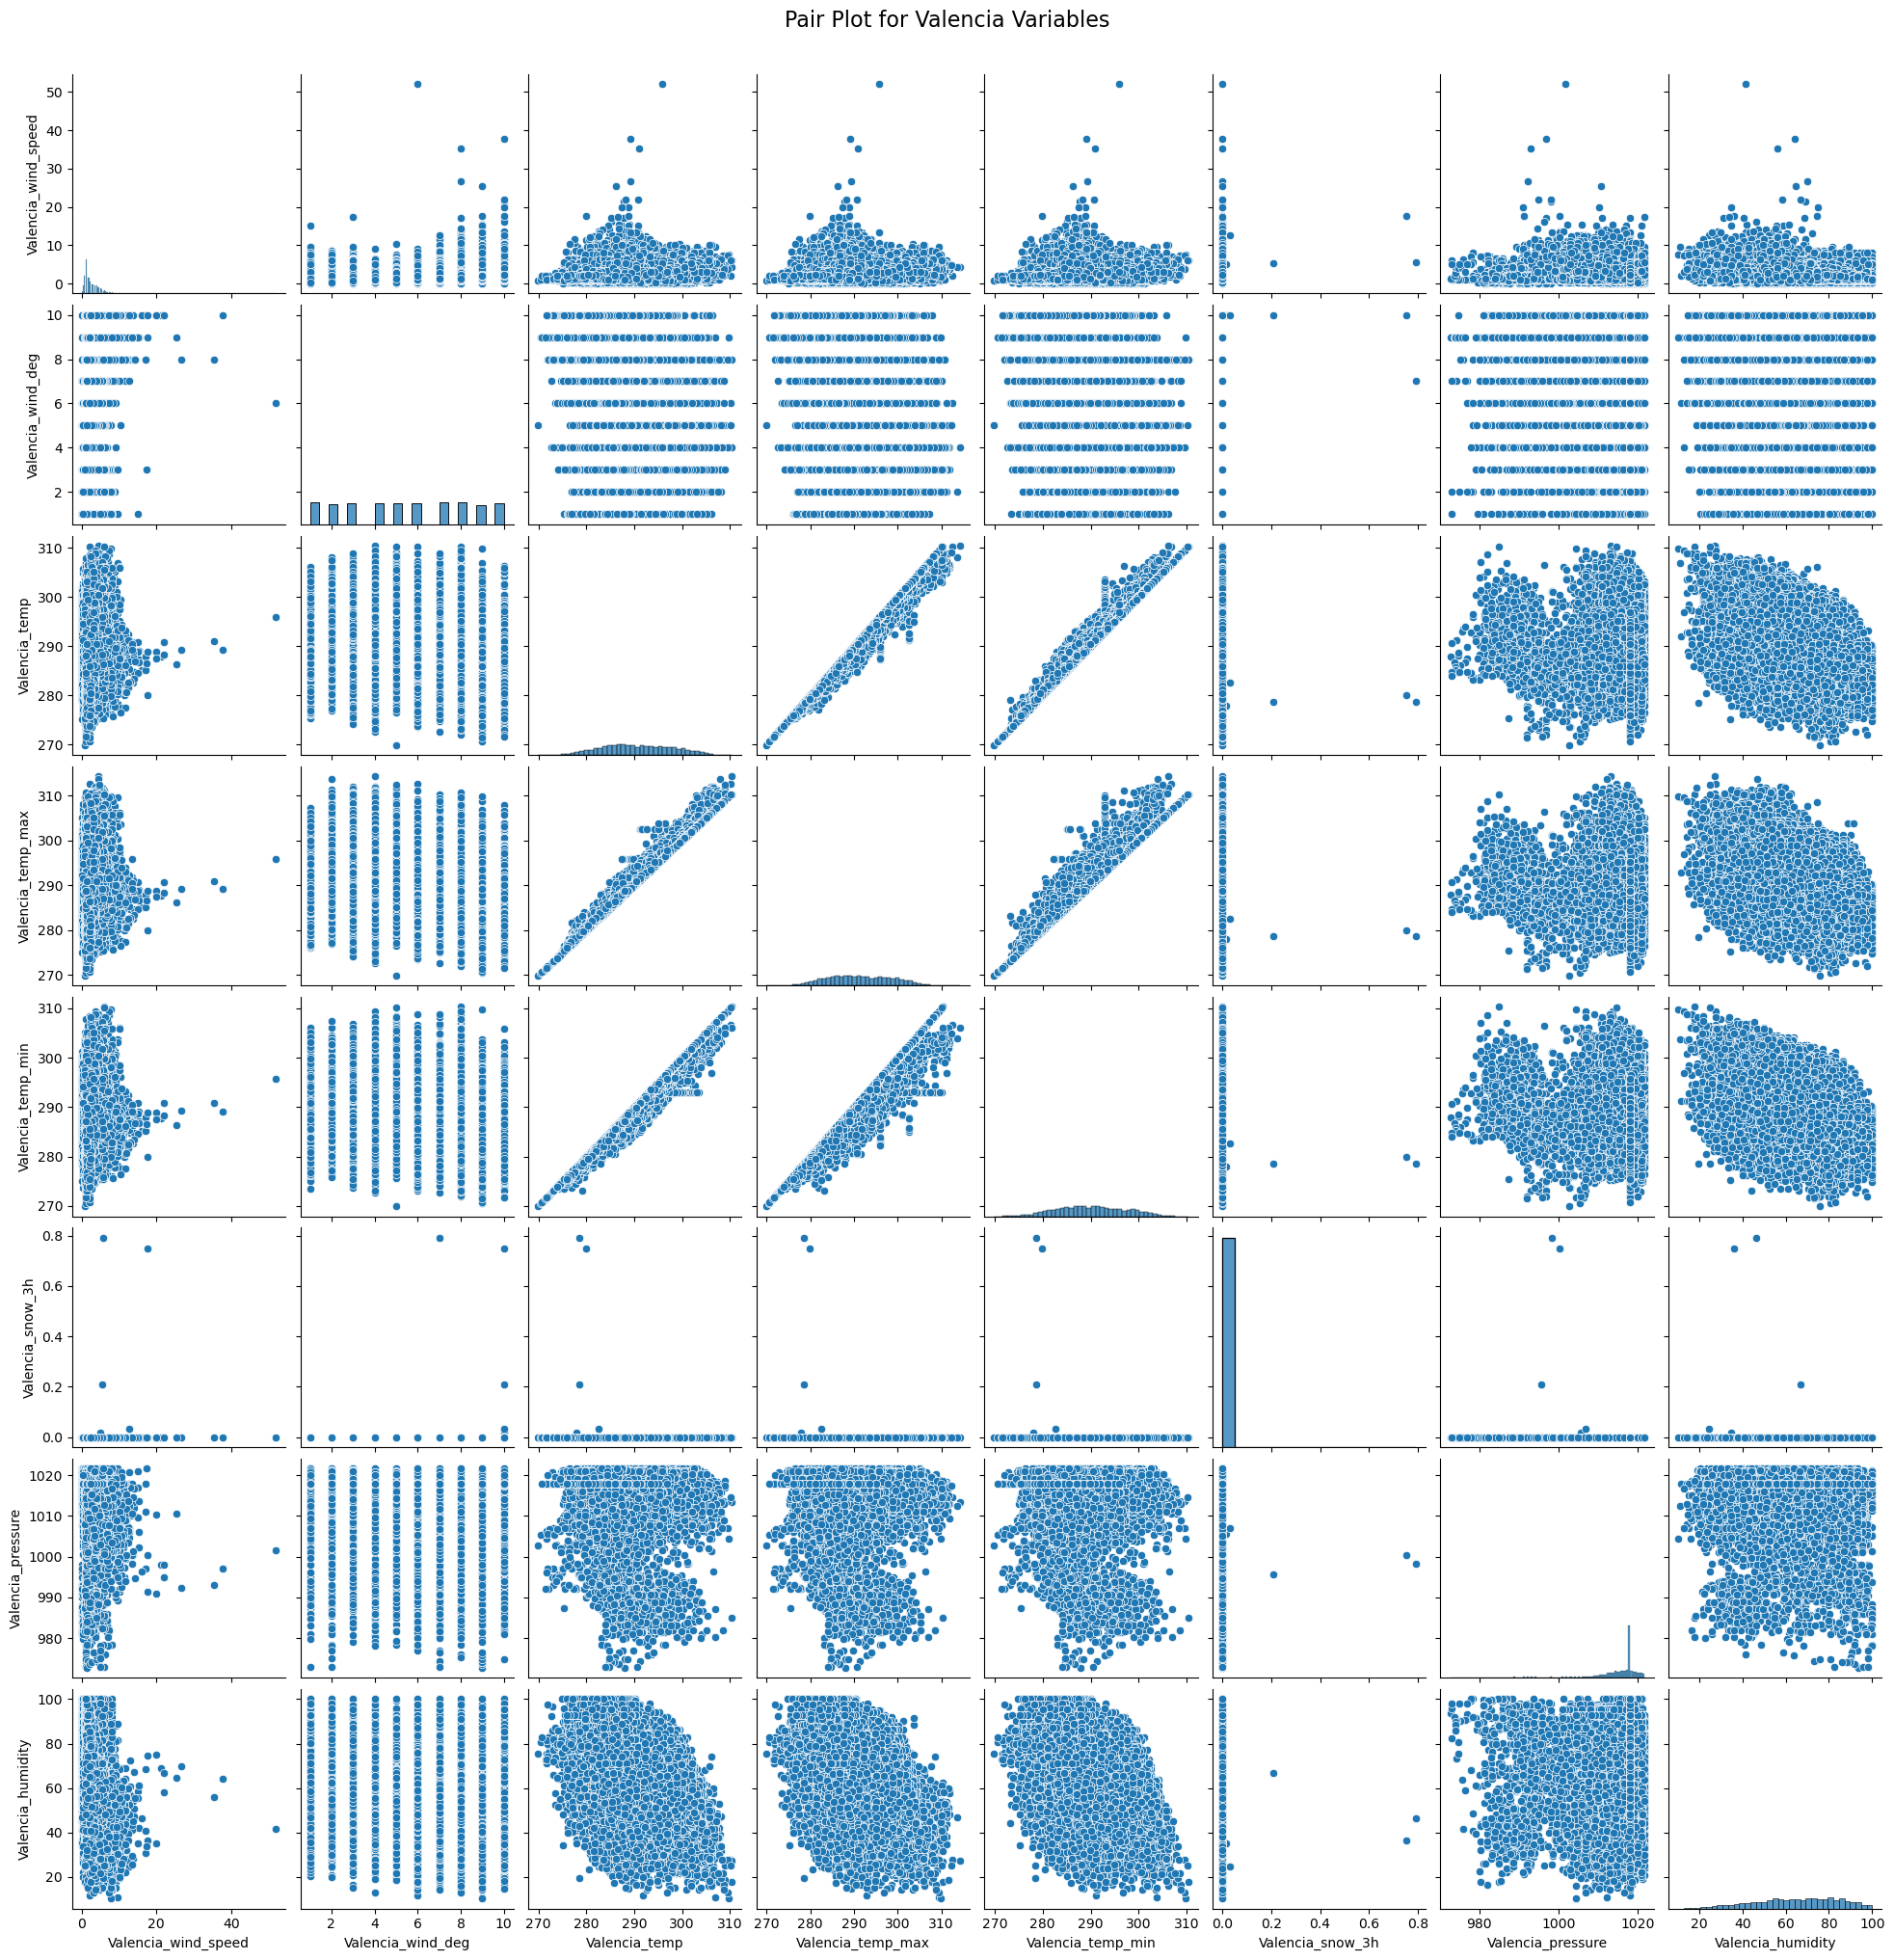

In [ ]:
# Reset the index of the DataFrame to ensure unique index values
df_clean_reset = df_clean.reset_index(drop=True)

# Create pair plot after resetting the index
sns.pairplot(df_clean_reset[['Valencia_wind_speed', 'Valencia_wind_deg', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_snow_3h', 'Valencia_pressure', 'Valencia_humidity']])
plt.suptitle("Pair Plot for Valencia Variables", y=1.02, fontsize=16)
plt.show()

*3.3.6.5. Average Humidity by Month:*

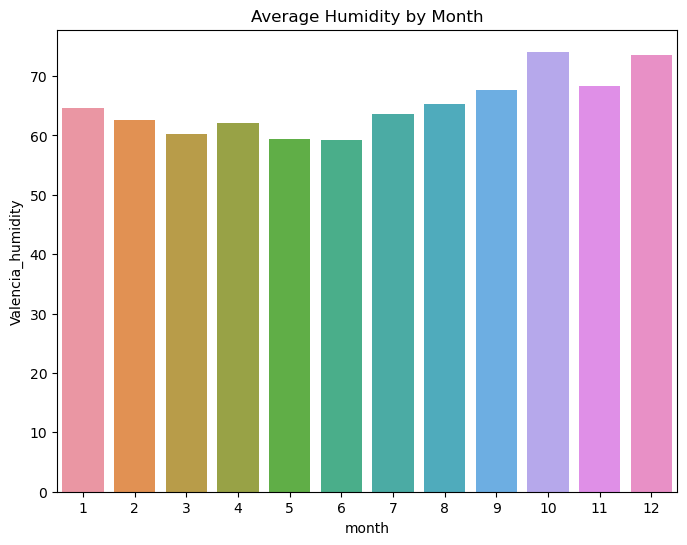

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='Valencia_humidity', data=df_clean, ci=None)
plt.title('Average Humidity by Month')
plt.show()

*3.3.6.6. Correlation Heatmap for Valencia:*

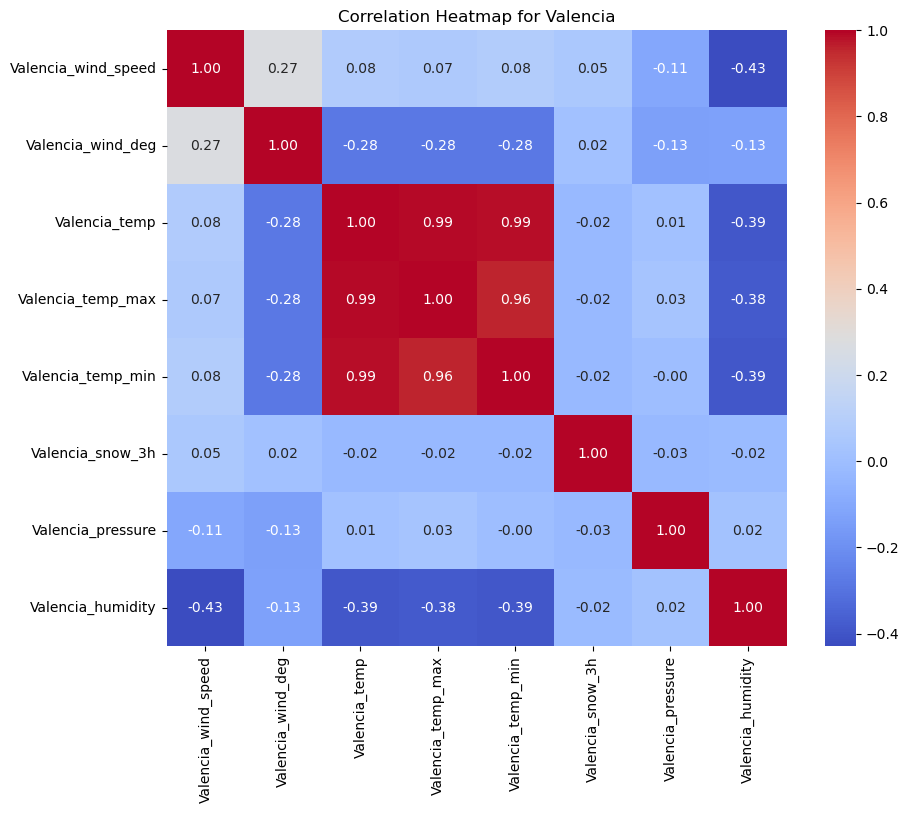

In [ ]:
# Selecting the specific columns of interest
selected_columns = ['Valencia_wind_speed', 'Valencia_wind_deg', 'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_snow_3h', 'Valencia_pressure', 'Valencia_humidity']

# Calculating the correlation matrix for the selected columns
correlation_matrix = df_clean[selected_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Valencia')
plt.show()

*3.3.6.7. Violin Plot of Temperature by Season:*

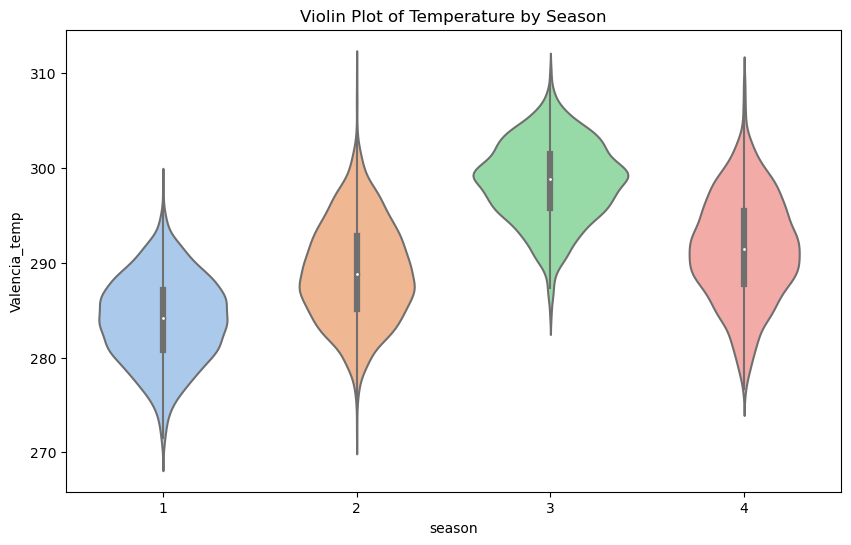

In [ ]:
selected_columns = ['Valencia_wind_speed', 'Valencia_wind_deg', 'Valencia_temp', 'Valencia_temp_max', 
                    'Valencia_temp_min', 'Valencia_snow_3h', 'Valencia_pressure', 'Valencia_humidity', 
                    'load_shortfall_3h']

plt.figure(figsize=(10, 6))
sns.violinplot(x='season', y='Valencia_temp', data=df_clean, palette='pastel')
plt.title('Violin Plot of Temperature by Season')
plt.show()

#### **3.4. Data Statistics**:

Using our clean data, let's perform some statistical analyses.

The function 'describe()' determines the count, mean, standard deviation, minimum, Q1, Q2, Q3, and maximum for each column of the data.

In [ ]:
df_clean.describe()

,season,year,month,day,hourofday,Barcelona_weather_id,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_temp,Barcelona_temp_min,...,Seville_humidity,Valencia_wind_speed,Valencia_wind_deg,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_snow_3h,Valencia_pressure,Valencia_humidity,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2.503723,2016.500300,6.525122,15.735256,10.498844,764.603446,2.782419,187.654241,289.869413,288.616766,...,63.774687,2.692873,5.476590,290.788513,291.362722,290.229939,0.000154,1013.567063,65.091814,10673.857612
std,1.114510,1.117584,3.447945,8.798064,6.873990,90.736191,1.758587,88.694717,6.680538,6.391989,...,22.219380,2.321759,2.863384,7.157835,7.441278,7.003619,0.010277,8.146984,19.040927,5218.046404
min,1.000000,2015.000000,1.000000,1.000000,0.000000,200.666667,0.000000,0.000000,270.816667,269.483333,...,8.333333,0.000000,1.000000,269.888000,269.888000,269.888000,0.000000,972.666667,10.333333,-6618.000000
25%,2.000000,2016.000000,4.000000,8.000000,4.500000,800.000000,1.333333,116.666667,284.816667,284.150000,...,46.333333,1.000000,3.000000,285.395500,285.783333,284.928833,0.000000,1012.333333,51.333333,7390.333333
50%,3.000000,2016.000000,7.000000,16.000000,9.000000,800.000000,2.333333,193.333333,289.426667,288.276333,...,67.000000,2.000000,5.000000,290.483333,291.150000,289.820000,0.000000,1016.666667,66.333333,11114.666667
75%,3.000000,2017.000000,10.000000,23.000000,15.000000,801.000000,3.666667,260.000000,295.150000,293.483333,...,83.000000,3.666667,8.000000,296.437500,297.159167,295.491667,0.000000,1018.000000,80.666667,14498.166667
max,4.000000,2018.000000,12.000000,31.000000,21.000000,804.000000,12.666667,360.000000,308.150000,306.816667,...,100.000000,52.000000,10.000000,310.426667,314.263333,310.272000,0.791667,1021.666667,100.000000,31904.000000


The function 'kurtosis()' determines the measure of outliers present in the data. When the kurtosis is more than three it indicates a large number of outliers. When the kurtosis is less than three it a lack of outliers.

In [ ]:
df.kurtosis()

Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          4.605919
Seville_temp_max          -0.596016
Madrid_pressure            3

The columns with **high outliers** are: 
- Bilbao_rain_1h, 
- Valencia_wind_speed, 
- Bilbao_wind_speed, 
- Barcelona_rain_1h, 
- Seville_rain_1h, 
- Bilbao_snow_3h, 
- Barcelona_pressure, 
- Seville_rain_3h, 
- Madrid_rain_1h, 
- Barcelona_rain_3h, 
- Valencia_snow_3h, 
- Madrid_weather_id, 
- Barcelona_weather_id

The columns with **low outliers** are: 
- Madrid_wind_speed, 
- Seville_humidity, 
- Madrid_humidity, 
- Bilbao_clouds_all, 
- Seville_clouds_all, 
- Bilbao_wind_deg, 
- Barcelona_wind_speed, 
- Barcelona_wind_deg, 
- Madrid_clouds_all, 
- Seville_wind_speed, 
- Bilbao_pressure, 
- Seville_temp_min, 
- Madrid_temp, 
- Madrid_temp_min, 
- load_shortfall_3h


#### **3.5. Feature Interactions**:

In [ ]:
# plot relevant feature interactions

#### **3.6. Evaluate Correlation**:

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions
# use df.skew() to determine the skewness of the data.
df.skew()
# fairly semetrical: Seville_humidity, Madrid_humanity, Bilbao_clouds_all, Barcelona_wind_deg, Bilbao_wind_deg, Seville_temp_min, Madrid_temp, Madrid_temp_min, load_shortfall_3h
# moderate negative skew: Bilbao_pressure
# high negative skew: Madrid_weather_id, Barcelona_weather_id
# high positive skew: Madrid_wind_speed, Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed, Seville_clouds_all, Barcelona_wind_speed, Madrid_clouds_all, Seville_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h
# the skewness which is most prevalent is 'high positive skew'. 

Madrid_wind_speed        1.452792
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -2.170499
Seville_temp_max         0.122162
Madrid_pressure         -2.140249
Valencia_temp_max        0.068277
Valencia_temp 

#### **3.7. EDA programs**:

In [ ]:
#import sweetviz as sv
#analyze_report = sv.analyze(df)
#analyze_report.show_html('report.html', open_browser=False)

In [ ]:
# show the report in a form of an HTML file
#analyze_report.show_html('report.html')

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### **5.1. Model Preparation:**

We will start off by splitting the data into a 'y' variable, an 'x' variable, and an 'x-train'. There variables will only look at the 'df_train' datasets.
Furthermore, we will create an 'x-test' variable which will only include the 'df_test' varaibles.

In [ ]:
y = df_clean[:len(df)][['load_shortfall_3h']]

x = df_clean[:len(df)].drop('load_shortfall_3h', axis=1)

x_train = df_clean[:len(df)].drop('load_shortfall_3h', axis=1)

# Only here we will look at the test dataset.
x_test = df_clean[len(df):].drop('load_shortfall_3h', axis=1)

Let's look at the 'x' variable. We can see that it includes all the data except for the y variables ('load_shortfall_3h').

In [ ]:
x.head(2)

,season,year,month,day,hourofday,Barcelona_weather_id,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_temp,Barcelona_temp_min,...,Seville_clouds_all,Seville_humidity,Valencia_wind_speed,Valencia_wind_deg,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_snow_3h,Valencia_pressure,Valencia_humidity
0,1,2015,1,1,3,800.0,6.333333,42.666667,281.013000,281.013000,...,0.0,74.333333,0.666667,5,269.888000,269.888000,269.888000,0.0,1002.666667,75.666667
1,1,2015,1,1,6,800.0,4.000000,139.000000,280.561667,280.561667,...,0.0,78.333333,1.666667,10,271.728333,271.728333,271.728333,0.0,1004.333333,71.000000


Let's look at the 'y' variable. We can see that it only includes 'y' variables ('load_shortfall_3h').

In [ ]:
y.head(2)

,load_shortfall_3h
0,6715.666667
1,4171.666667


### **5.2. Creating targets and features datasets:** 

In [ ]:
# create targets and features dataset

### **5.3. Creating machine learning model:** 

In [ ]:
# create one or more ML models

### **5.4. Evaluating machine learning models:** 

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

### **6.1. Model comparisons:** 

In [ ]:
# Compare model performance

### **6.2. Best model:** 

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic